In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

忙碌的一天从一杯咖啡开始，可能这是不少大城市上班族的生活方式。来到北京也有快五年了，发现这里咖啡店很多，于是想着做一个关于咖啡店的数据分析项目。

星巴克门店信息数据集，更新于2017年2月。

北京的星巴克门店果真比纽约还要多？答案是：Yes.
闲话不多说，开始搞事情。

In [ ]:
ls ../input/

In [8]:
#-*-coding:utf-8-*-
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
data = pd.read_csv('../input/directory.csv',encoding = 'gbk')

In [15]:
#数据集中有哪些字段
data.columns

Index(['Brand', 'Store Number', 'Store Name', 'Ownership Type',
       'Street Address', 'City', 'State/Province', 'Country', 'Postcode',
       'Phone Number', 'Timezone', 'Longitude', 'Latitude'],
      dtype='object')

In [16]:
data[data.Country == 'CN'].head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
2091,Starbucks,22901-225145,北京西站第一咖啡店,Company Owned,"丰台区, 北京西站通廊7-1号, 中关村南大街2号",北京市,11,CN,100073,NaN,GMT+08:00 Asia/Beijing,116.32,39.90
2092,Starbucks,32320-116537,北京华宇时尚店,Company Owned,"海淀区, 数码大厦B座华宇时尚购物中心内, 蓝色港湾国际商区1座C1-3单元首层、",北京市,11,CN,100086,010-51626616,GMT+08:00 Asia/Beijing,116.32,39.97
2093,Starbucks,32447-132306,北京蓝色港湾圣拉娜店,Company Owned,"朝阳区朝阳公园路6号, 二层C1-3单元及二层阳台, 太阳宫中路12号",北京市,11,CN,100020,010-59056343,GMT+08:00 Asia/Beijing,116.47,39.95
2094,Starbucks,17477-161286,北京太阳宫凯德嘉茂店,Company Owned,"朝阳区, 太阳宫凯德嘉茂一层01-44/45号, 东三环北路27号",北京市,11,CN,100028,010-84150945,GMT+08:00 Asia/Beijing,116.45,39.97
2095,Starbucks,24520-237564,北京东三环北店,Company Owned,"朝阳区, 嘉铭中心大厦A座B1层024商铺, 金融大街7号",北京市,11,CN,NaN,NaN,GMT+08:00 Asia/Beijing,116.46,39.93


In [17]:
#查看有多少空值
data.isnull().sum()

Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
Brand             25600 non-null object
Store Number      25600 non-null object
Store Name        25600 non-null object
Ownership Type    25600 non-null object
Street Address    25598 non-null object
City              25585 non-null object
State/Province    25600 non-null object
Country           25600 non-null object
Postcode          24078 non-null object
Phone Number      18739 non-null object
Timezone          25600 non-null object
Longitude         25599 non-null float64
Latitude          25599 non-null float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


In [19]:
#描述性统计，虽然对于这个案例来说没有啥意义
data.describe()

,Longitude,Latitude
count,25599.000000,25599.000000
mean,-27.872234,34.793016
std,96.844046,13.342332
min,-159.460000,-46.410000
25%,-104.665000,31.240000
50%,-79.350000,36.750000
75%,100.630000,41.570000
max,176.920000,64.850000


**星巴克旗下有哪些品牌？**

看到字段Brand，于是展开看看里面有什么。

In [20]:
data.Brand.value_counts()

Starbucks                25249
Teavana                    348
Evolution Fresh              2
Coffee House Holdings        1
Name: Brand, dtype: int64

**我们把重心放在星巴克的咖啡门店上面，所以只查看Brand是Starbucks的数据集内容。**

In [21]:
coffee = data[data.Brand == 'Starbucks']

**几个有趣的现象：**

In [22]:
#全世界一共有多少家星巴克门店？
coffee.shape[0]

25249

In [23]:
#全世界一共多少个国家开设了星巴克门店？
coffee.Country.nunique()

73

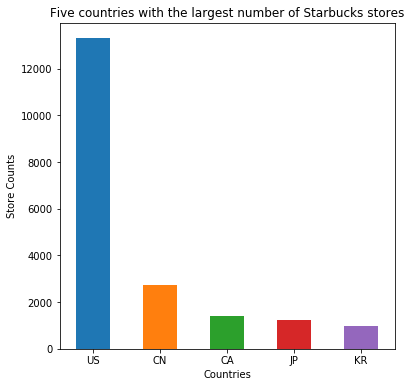

In [24]:
#拥有星巴克门店最多的国家是哪里？
p1 = plt.figure(1,figsize=(6,6))
coffee.Country.value_counts().head().plot(kind='bar',rot=0)
plt.title('Five countries with the largest number of Starbucks stores')
plt.ylabel('Store Counts')
plt.xlabel('Countries')
plt.show()

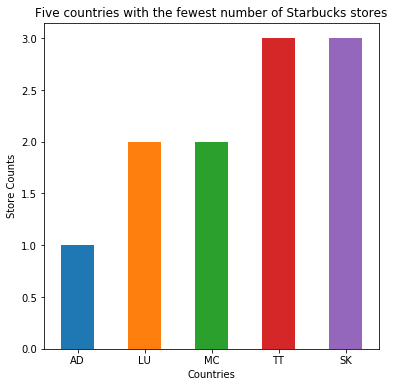

In [25]:
#拥有星巴克门店最少的国家是哪里？
p1 = plt.figure(1,figsize=(6,6))
coffee.Country.value_counts(ascending=True).head().plot(kind='bar',rot=0)
plt.title('Five countries with the fewest number of Starbucks stores')
plt.ylabel('Store Counts')
plt.xlabel('Countries')
plt.show()

* AD - Andorra - 安道尔共和国
* LU - Luxembourg - 卢森堡
* MC - Monaco - 摩纳哥
* CW - Curaçao - 库拉索
* SK - Slovakia - 斯洛伐克

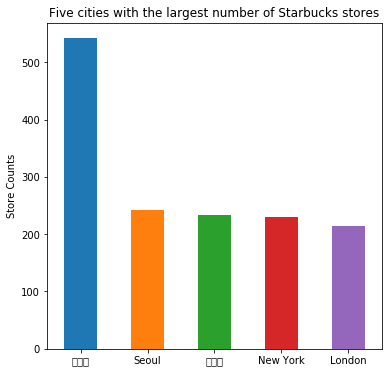

In [39]:
#拥有星巴克门店最多的城市是哪里？
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
p2 =plt.figure(1,figsize=(6,6))
coffee.City.value_counts().head().plot(kind='bar',rot=0)
plt.title('Five cities with the largest number of Starbucks stores')
plt.ylabel('Store Counts')
plt.show()

数量最多的是上海，其次是首尔，第三是北京，这些城市的门店都比纽约多啊

星巴克门店的所有权类型有哪些？

因为在数据集中看到了Ownership Type这个字段，所以想看看星巴克门店的所有权类型，做做研究。

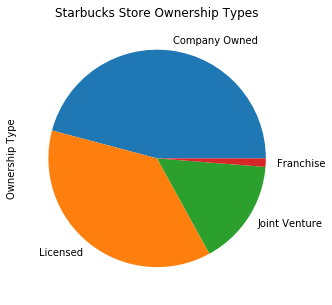

In [29]:
p3 = plt.figure(1,figsize=(5,5))
plt.title('Starbucks Store Ownership Types')
coffee['Ownership Type'].value_counts().plot(kind='pie')
plt.show()

解释一下：

* Company Owned：公司独资直营，这也是星巴克门店最多的经营方式
* Licensed: 许可经营
* Joint Venture: 合资经营，比如：国内江浙沪地区的星巴克最早就是由星巴克与统一集团联手经营
* Franchise：授权经营，类似麦当劳的经营模式